# Курсовой проект для курса "Python для Data Science". 


## Цель: Построение модели для предсказания цен на недвижимость.


## Метрика: R2


## Содержание:


1. Подготовка данных:

        1.1 Импорты и предварительные настройки
        1.2 Функции для стандартных операций
        1.3 Загрузка данных
        1.4 Анализ данных и визуализация
        1.5 Обработка данных, заполнение пропусков
                
2. Построение модели:

        2.1 Разбивка итоговых данных
        2.2 Выбор модели
        2.3 Обучение модели
        2.4 Проверка качества модели
        
3. Итоговый ответ.

# 1. Подготовка данных:

## 1.1 Импорты и предварительные настройки

In [1]:
# Импорты необходимых библиотек:

# 1. Основные библиотеки
import numpy as np
import pandas as pd
import pickle   # сохранение модели

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Разделение датасета
from sklearn.model_selection import train_test_split

# 3. Модели
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# 4. Метрики качества
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

from datetime import datetime
from pylab import rcParams

In [2]:
#Магические команды:

%matplotlib inline
rcParams['figure.figsize'] = 13, 15
rcParams.update({'font.size': 14})

## 1.2 Функции для стандартных операций

Функция для обработки пропусков

In [3]:
def get_NaN_info(X):
    return len(X)-X.count()

def set_NaN_median(X, col1):
    X.loc[X[col1].isnull(), col1] = X[col1].median()

## 1.3 Загрузка данных

In [4]:
# Путь к данным
TRAIN_DATASET_PATH = './train.csv'
TEST_DATASET_PATH = './test.csv'

In [5]:
# Загрузка тренировочного датасета
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.head(5)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [6]:
# Загрузка тестового датасета
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.head(5)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B


## 1.4 Анализ данных и визуализация

In [7]:
# Описание датасета и возможные преобразования:

# Id - тип int64 нужно преобразовать в str
# DistrictId - тип int64 нужно преобразовать в object
# Rooms - тип float64 нужно преобразовать в int64
# HouseFloor - тип float64 нужно преобразовать в int64
# Ecology_1 - тип float64 нужно преобразовать в object

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

Описание датасета:

    Id - идентификационный номер квартиры
    DistrictId - идентификационный номер района
    Rooms - количество комнат
    Square - площадь
    LifeSquare - жилая площадь
    KitchenSquare - площадь кухни
    Floor - этаж
    HouseFloor - количество этажей в доме
    HouseYear - год постройки дома
    Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
    Social_1, Social_2, Social_3 - социальные показатели местности
    Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
    Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
    Price - цена квартиры

In [8]:
train_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [9]:
train_df.head(5)
# Поля  Healthcare_1, Ecology_2-3 Shops_2 нужно преобразовать

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [10]:
# В полях LifeSquare и Healthcare_1 много пропущенных значений
train_df.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [11]:
train_df['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        36.,  37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,  99., 117.])

In [12]:
train_df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42])

In [13]:
# Есть года постройки не соответсвующие реальности (4968,20052011 )
train_df['HouseYear'].sort_values().unique()

array([    1910,     1912,     1914,     1916,     1917,     1918,
           1919,     1928,     1929,     1930,     1931,     1932,
           1933,     1934,     1935,     1936,     1937,     1938,
           1939,     1940,     1941,     1942,     1947,     1948,
           1950,     1951,     1952,     1953,     1954,     1955,
           1956,     1957,     1958,     1959,     1960,     1961,
           1962,     1963,     1964,     1965,     1966,     1967,
           1968,     1969,     1970,     1971,     1972,     1973,
           1974,     1975,     1976,     1977,     1978,     1979,
           1980,     1981,     1982,     1983,     1984,     1985,
           1986,     1987,     1988,     1989,     1990,     1991,
           1992,     1993,     1994,     1995,     1996,     1997,
           1998,     1999,     2000,     2001,     2002,     2003,
           2004,     2005,     2006,     2007,     2008,     2009,
           2010,     2011,     2012,     2013,     2014,     2

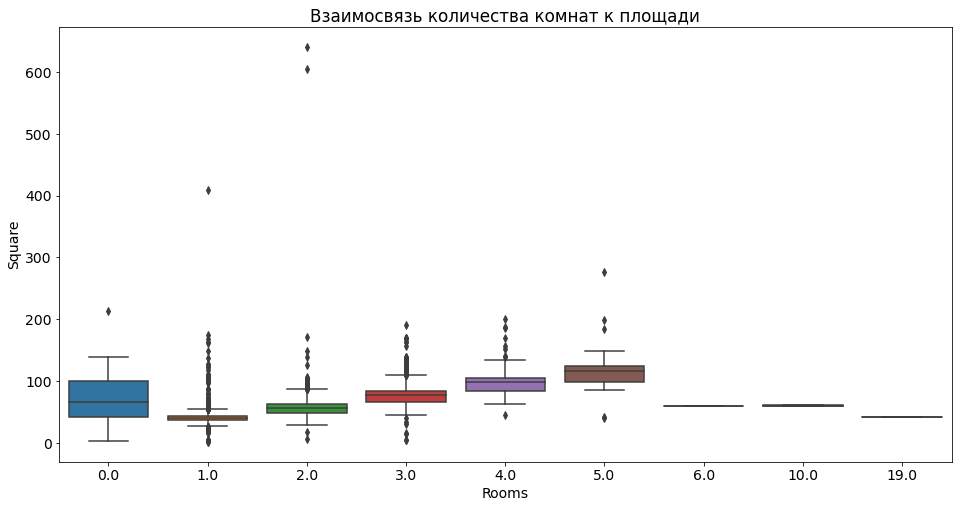

In [14]:
plt.figure(figsize = (16, 8))
sns.boxplot(x=train_df['Rooms'],y=train_df['Square'])
plt.title('Взаимосвязь количества комнат к площади')
plt.show()

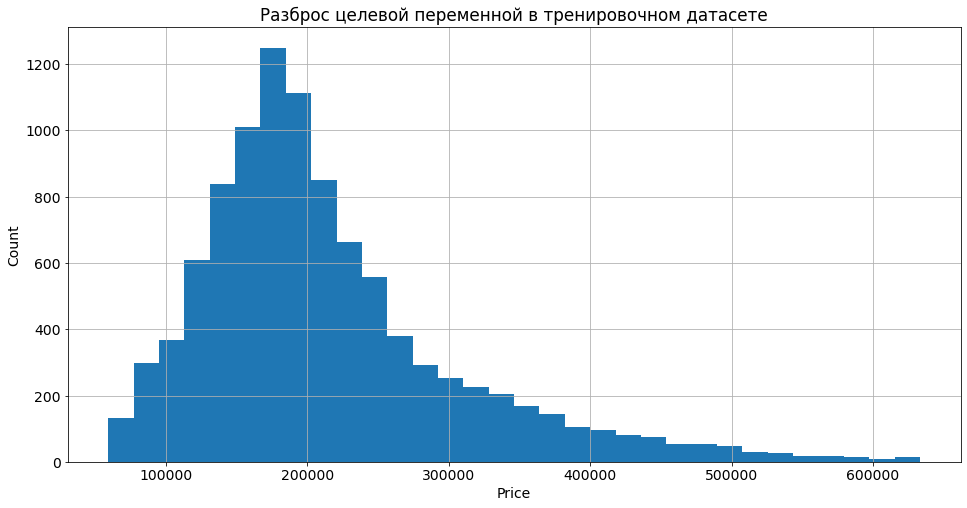

In [15]:
plt.figure(figsize = (16, 8))
train_df['Price'].hist(bins=32)
plt.ylabel('Сount')
plt.xlabel('Price')
plt.title('Разброс целевой переменной в тренировочном датасете')
plt.show()

## 1.5 Обработка данных, заполнение пропусков

In [16]:
train_df['Healthcare_1'] = train_df['Healthcare_1'].median()
train_df['LifeSquare'] = train_df['LifeSquare'].median()

In [17]:
# Номинативные переменные:

train_df['Id'] = train_df['Id'].astype(str)

train_df['DistrictId'] = train_df['DistrictId'].astype(object)
train_df['Rooms'] = train_df['Rooms'].astype(int)
train_df['HouseFloor'] = train_df['HouseFloor'].astype(int)
train_df['Ecology_1'] = train_df['Ecology_1'].astype(object)

train_df['Healthcare_1'] = train_df['Healthcare_1'].astype(str)
train_df['Helthcare_2'] = train_df['Helthcare_2'].astype(int)
binary_to_numbers = {'A': 0, 'B': 1}

train_df['Ecology_2'] = train_df['Ecology_2'].astype(str)
train_df['Ecology_3'] = train_df['Ecology_3'].astype(str)
train_df['Shops_2'] = train_df['Shops_2'].astype(str)


In [18]:
binary_to_numbers = {'A': 0, 'B': 1}

train_df['Ecology_2'] = train_df['Ecology_2'].replace(binary_to_numbers)
train_df['Ecology_3'] = train_df['Ecology_3'].replace(binary_to_numbers)
train_df['Shops_2'] = train_df['Shops_2'].replace(binary_to_numbers)
train_df['Healthcare_1'] = train_df['Healthcare_1'].replace(binary_to_numbers)

In [19]:
train_df.dtypes

Id                object
DistrictId        object
Rooms              int64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor         int64
HouseYear          int64
Ecology_1         object
Ecology_2          int64
Ecology_3          int64
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1      object
Helthcare_2        int64
Shops_1            int64
Shops_2            int64
Price            float64
dtype: object

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  object 
 1   DistrictId     10000 non-null  object 
 2   Rooms          10000 non-null  int64  
 3   Square         10000 non-null  float64
 4   LifeSquare     10000 non-null  float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  int64  
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  object 
 10  Ecology_2      10000 non-null  int64  
 11  Ecology_3      10000 non-null  int64  
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   10000 non-null  object 
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [21]:
# Преобразование квартир, где более 6 комнат к медиане
train_df.loc[train_df['Rooms'] == 0, 'Rooms'] = 1
train_df.loc[train_df['Rooms'] >= 6, 'Rooms'] = train_df['Rooms'].median()

In [22]:
train_df['Rooms'].sort_values().unique()

array([1, 2, 3, 4, 5])

In [23]:
# Корректировка года постройки 
train_df.loc[train_df['HouseYear'] > 2021, 'HouseYear'] = 2021

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  object 
 1   DistrictId     10000 non-null  object 
 2   Rooms          10000 non-null  int64  
 3   Square         10000 non-null  float64
 4   LifeSquare     10000 non-null  float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  int64  
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  object 
 10  Ecology_2      10000 non-null  int64  
 11  Ecology_3      10000 non-null  int64  
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   10000 non-null  object 
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [25]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
count,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.887600,56.315775,3.278126e+01,6.273300,8.526700,12.609400,1984.872600,0.990300,0.972500,24.687000,5352.157400,8.039200,1.319500,4.231300,0.917500,214138.857399
std,0.811438,21.058732,4.320316e-12,28.560917,5.241148,6.775974,18.416734,0.098015,0.163543,17.532614,4006.799803,23.831875,1.493601,4.806341,0.275139,92872.293865
min,1.000000,1.136859,3.278126e+01,0.000000,1.000000,0.000000,1910.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,3.278126e+01,1.000000,4.000000,9.000000,1974.000000,1.000000,1.000000,6.000000,1564.000000,0.000000,0.000000,1.000000,1.000000,153872.633942
50%,2.000000,52.513310,3.278126e+01,6.000000,7.000000,13.000000,1977.000000,1.000000,1.000000,25.000000,5285.000000,2.000000,1.000000,3.000000,1.000000,192269.644879
75%,2.000000,65.900625,3.278126e+01,9.000000,12.000000,17.000000,2001.000000,1.000000,1.000000,36.000000,7227.000000,5.000000,2.000000,6.000000,1.000000,249135.462171
max,5.000000,641.065193,3.278126e+01,2014.000000,42.000000,117.000000,2021.000000,1.000000,1.000000,74.000000,19083.000000,141.000000,6.000000,23.000000,1.000000,633233.466570


## 2.1 Разбивка итоговых данных

In [26]:
X = train_df.drop(labels=['Price'], axis=1)
y = train_df['Price'].values

In [27]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

## 2.2 Выбор модели

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [29]:
model_dict = {
   'lr': LinearRegression(),
#    'lasso': Lasso(random_state=42),
#    'ridge': Ridge(random_state=42),
#    'enet': ElasticNet(random_state=42),
   'knn': KNeighborsRegressor(),
   'dt': DecisionTreeRegressor(random_state=42),
   'rf': RandomForestRegressor(random_state=42)
}

score_list = []

for model in model_dict:
    model_dict[model].fit(X_train, y_train)
    y_pred_train = model_dict[model].predict(X_train)
    y_pred_valid = model_dict[model].predict(X_valid)
    score_train = r2_score(y_train, y_pred_train)
    score_valid = r2_score(y_valid, y_pred_valid)
    score_list.append((score_train, score_valid))

for model, scores in zip(model_dict.keys(), score_list):
    print(f'{model}: \n\ttrain: {np.round(scores[0], 4)} \n\tvalid: {np.round(scores[1], 4)}')
    

# На тренировочном датасете модель Rundom Forest показывает лучшие результаты


lr: 
	train: 0.4835 
	valid: 0.5164
knn: 
	train: 0.3816 
	valid: 0.0461
dt: 
	train: 1.0 
	valid: 0.4526
rf: 
	train: 0.9611 
	valid: 0.7348


##  2.3 Обучение модели

Обработка тестовых данных.

In [30]:
test_df['Healthcare_1'] = test_df['Healthcare_1'].median()
test_df['LifeSquare'] = test_df['LifeSquare'].median()

In [31]:
# Номинативные переменные:

test_df['Id'] = test_df['Id'].astype(str)

test_df['DistrictId'] = test_df['DistrictId'].astype(object)
test_df['Rooms'] = test_df['Rooms'].astype(int)
test_df['HouseFloor'] = test_df['HouseFloor'].astype(int)
test_df['Ecology_1'] = test_df['Ecology_1'].astype(object)

test_df['Healthcare_1'] = test_df['Healthcare_1'].astype(str)
test_df['Helthcare_2'] = test_df['Helthcare_2'].astype(int)
binary_to_numbers = {'A': 0, 'B': 1}

test_df['Ecology_2'] = test_df['Ecology_2'].astype(str)
test_df['Ecology_3'] = test_df['Ecology_3'].astype(str)
test_df['Shops_2'] = test_df['Shops_2'].astype(str)


In [32]:
binary_to_numbers = {'A': 0, 'B': 1}

test_df['Ecology_2'] = test_df['Ecology_2'].replace(binary_to_numbers)
test_df['Ecology_3'] = test_df['Ecology_3'].replace(binary_to_numbers)
test_df['Shops_2'] = test_df['Shops_2'].replace(binary_to_numbers)
test_df['Healthcare_1'] = test_df['Healthcare_1'].replace(binary_to_numbers)

In [33]:
# Преобразование квартир, где более 6 комнат к медиане
test_df.loc[test_df['Rooms'] == 0, 'Rooms'] = 1
test_df.loc[test_df['Rooms'] >= 6, 'Rooms'] = test_df['Rooms'].median()

In [34]:
# Корректировка года постройки 
test_df.loc[test_df['HouseYear'] > 2021, 'HouseYear'] = 2021

In [35]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   object 
 1   DistrictId     5000 non-null   object 
 2   Rooms          5000 non-null   int64  
 3   Square         5000 non-null   float64
 4   LifeSquare     5000 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   int64  
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   object 
 10  Ecology_2      5000 non-null   int64  
 11  Ecology_3      5000 non-null   int64  
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   5000 non-null   object 
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [36]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [37]:
# Выбор модели
RF_model = GradientBoostingRegressor(criterion='mse',
                                     max_depth=7,
                                     min_samples_leaf=50,
                                     random_state=42,  
                                     n_estimators=2250, 
                                     max_features='sqrt', 
                                     loss='huber', 
                                     learning_rate=0.025)

In [38]:
# Обучение модели на тренировочных данных
RF_model.fit(X_train, y_train)

GradientBoostingRegressor(criterion='mse', learning_rate=0.025, loss='huber',
                          max_depth=7, max_features='sqrt', min_samples_leaf=50,
                          n_estimators=2250, random_state=42)

In [39]:
y_pred_train = RF_model.predict(X_train)
y_pred_valid = RF_model.predict(X_valid)

In [40]:
# Результаты модели на обучающем датасете
score_train = r2_score(y_train, y_pred_train)
score_valid = r2_score(y_valid, y_pred_valid)
print(f'{score_train} - R2 score train \n{score_valid} - R2 score valid ')

0.8709568132870912 - R2 score train 
0.7587544551415203 - R2 score valid 


## 3. Итоговый ответ

In [41]:
test_df.shape

(5000, 19)

In [42]:
test_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
count,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,1.905800,56.449500,3.292509e+01,5.976800,8.632000,12.601000,1984.392600,0.990400,0.970200,24.933800,5406.900000,8.262600,1.31940,4.242800,0.917600
std,0.806137,19.092787,1.520714e-12,9.950018,5.483228,6.789213,18.573149,0.097518,0.170052,17.532202,4026.614773,23.863762,1.47994,4.777365,0.275001
min,1.000000,1.378543,3.292509e+01,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,41.906231,3.292509e+01,1.000000,4.000000,9.000000,1973.000000,1.000000,1.000000,6.000000,1564.000000,0.000000,0.00000,1.000000,1.000000
50%,2.000000,52.921340,3.292509e+01,6.000000,7.000000,12.000000,1977.000000,1.000000,1.000000,25.000000,5285.000000,2.000000,1.00000,3.000000,1.000000
75%,2.000000,66.285129,3.292509e+01,9.000000,12.000000,17.000000,2000.000000,1.000000,1.000000,36.000000,7287.000000,5.000000,2.00000,6.000000,1.000000
max,5.000000,223.453689,3.292509e+01,620.000000,78.000000,99.000000,2020.000000,1.000000,1.000000,74.000000,19083.000000,141.000000,6.00000,23.000000,1.000000


In [43]:
submit = pd.read_csv('./sample_submission.csv')
submit.head()

,Id,Price
0,4567,200000.0
1,5925,200000.0
2,960,200000.0
3,3848,200000.0
4,746,200000.0


In [44]:
predictions = RF_model.predict(test_df)
predictions


array([162220.66348455, 122869.64039467, 131929.59862668, ...,
       154087.16833485, 187373.32830541, 318866.9877812 ])

In [45]:
predictions.shape

(5000,)

In [46]:
submit['Price'] = predictions
submit.head()

,Id,Price
0,4567,162220.663485
1,5925,122869.640395
2,960,131929.598627
3,3848,113061.539850
4,746,183286.290460


In [47]:
submit.to_csv('ls9_submit.csv', index=False)